In [1]:
import warnings
warnings.filterwarnings('ignore')

<h1 style = "fontsize:400%;text-align:center;">QBUS3850: Time Series and Forecasting</h1>
<h2 style = "fontsize:300%;text-align:center;">ARIMA</h2>
<h3 style = "fontsize:200%;text-align:center;">Lecture Notes</h3>

<h2 style = "fontsize:300%;text-align:center;">Why ARIMA?</h2>

# ARIMA models

- Have been a popular forecasting tool since at least the 1970s 
- Why do they work?
  - Any stationary series has an ARMA representation.
  - Maximum likelihood can be used to estimate stationary ARMA models. Forecasts from such models are easy to generate.
  - Data can be differenced to make it stationary.  
- First question: What is stationarity?

<h2 style = "fontsize:300%;text-align:center;">Stationarity</h2>

# Expectations in time series

- Consider the time series
$$Y_1,Y_2,\dots,Y_T$$
- What do we mean by the expected value $E(Y_t)$?
- Let the density of $Y_t$ be $f_{Y_t}$. The expected value is given by
$$E(Y_t)=\int y_tf_{Y_t}(y_t)dy_t$$
- This is the *unconditional* expected value.


# Understanding expectations



<img src="drstrange.jpeg" alt="multiverse" width="800"/>

# An Illustration

- Imagine $I$ multiverses each with different realisations of the time series
$$\begin{aligned}\textrm{Computer 1:}\,&y^{(1)}_1,y^{(1)}_2\dots, y^{(1)}_t,\dots,y^{(1)}_{T}\\\textrm{Computer 2:}\,& y^{(2)}_1,y^{(2)}_2\dots, y^{(2)}_t,\dots,y^{(2)}_{T}\\&\vdots\quad\vdots\quad\vdots\quad\vdots\quad\vdots\quad\vdots\\\textrm{Computer T:}\,& y^{(I)}_1,y^{(I)}_2\dots, y^{(I)}_t,\dots,y^{(I)}_{T}\end{aligned}$$
- Let the number of multiverses go to infinity
- Take observation $t$ from each multiverse and average them.
$$E(Y_t)=\underset{I\rightarrow\infty}{\lim}\frac{1}{I}\sum\limits_{i=1}^{I}Y^{(i)}_t$$

# Variance and (Auto-)Covariance in Time Series

- The variance of $Y_t$ is given by
$$\textrm{Var}(Y_t)=E\left[(y_t-\mu_t)^2\right]$$
- Here $\mu_t=E(Y_t)$ is just shorthand

- The covariance between $Y_t$ and $Y_{t-k}$ is given by
$$\textrm{Cov}(Y_t,T_{t-k})=E\left[(y_t-\mu_t)(y_{t-k}-\mu_{t-k})\right]$$
- Together, the variance and covariance make up the first two *moments* of the time series.
- Both can be defined using an integral, but also via the "multiverses" thought experiment.

# Variance Covariance Matrix

It is often convenient to put all variances and coavariances into a matrix

$$\textrm{Var-Cov}(\mathbf{Y})=\begin{bmatrix}\textrm{Var}(Y_1) & \textrm{Cov}(Y_1,Y_2) &\cdots& \textrm{Cov}(Y_1,Y_T) \\ \textrm{Cov}(Y_1,Y_2)&\textrm{Var}(Y_2) &\cdots& \textrm{Cov}(Y_2,Y_T)\\\vdots&\vdots&\ddots&\vdots \\\textrm{Cov}(Y_1,Y_T)&\textrm{Cov}(Y_2,Y_T) &\cdots& \textrm{Var}(Y_T)\end{bmatrix}$$

# Weak Stationarity 

If the following properties hold:

  - $E(Y_t)=\mu$ Expected value not a function of time
  - $V(Y_t)=\sigma^2$ Variance not a function of time
  - $V(Y_t,Y_{t-k})=\gamma_k$ Covariance not a function of time (It can be a function of $k$)

Then a series is *weakly (or covariance) stationary*

# Strong stationarity


If the following property holds:

  - $f(Y_{t},Y_{t+{j_1}},Y_{t+{j_1}},\dots,Y_{t+{j_n}})$ only depends on $(j_1,j_2,\dots,j_n)$ and not on time
 
Then a series is *strongly stationary*

- Strong stationarity always implies weak stationarity
- The reverse is true for Gaussian distributions but not in general

# Examples

Consider two processes: 

- $Y_t=0.2\times t+\epsilon_t$

- $Y_t=\sum_{i=1}\epsilon_i$

In both cases $\epsilon_t\overset{i.i.d}\sim N(0,\sigma^2)$

# Example 1

$$\begin{aligned}E(Y_t)&=E(0.2t+\epsilon_t)\\&=E(0.2t)+E(\epsilon_t)\\&=0.2t+0=0.2t\end{aligned}$$

Expected value depends on time. The series is nonstationary

Your turn: does the variance depend on time?

# Example 2

$$\begin{aligned}E(Y_t)&=E\left(\sum\limits_{i=1}^t\epsilon_i\right)\\&=\sum\limits_{i=1}^tE(\epsilon_i)\\&=\sum\limits_{i=1}^t0=0\end{aligned}$$

Expected value depends on time. The series is nonstationary

Your turn: does the variance depend on time?

# Simulation: Example 1

In [2]:
import numpy as np
T=200
I=8
all_y = np.random.standard_normal((I,T)) 
trend = 0.2*(np.arange(0,T)+1)
for i in range(I):
    all_y[i,] = all_y[i,] + trend
import matplotlib.pyplot as plt

# Plots: Example 1

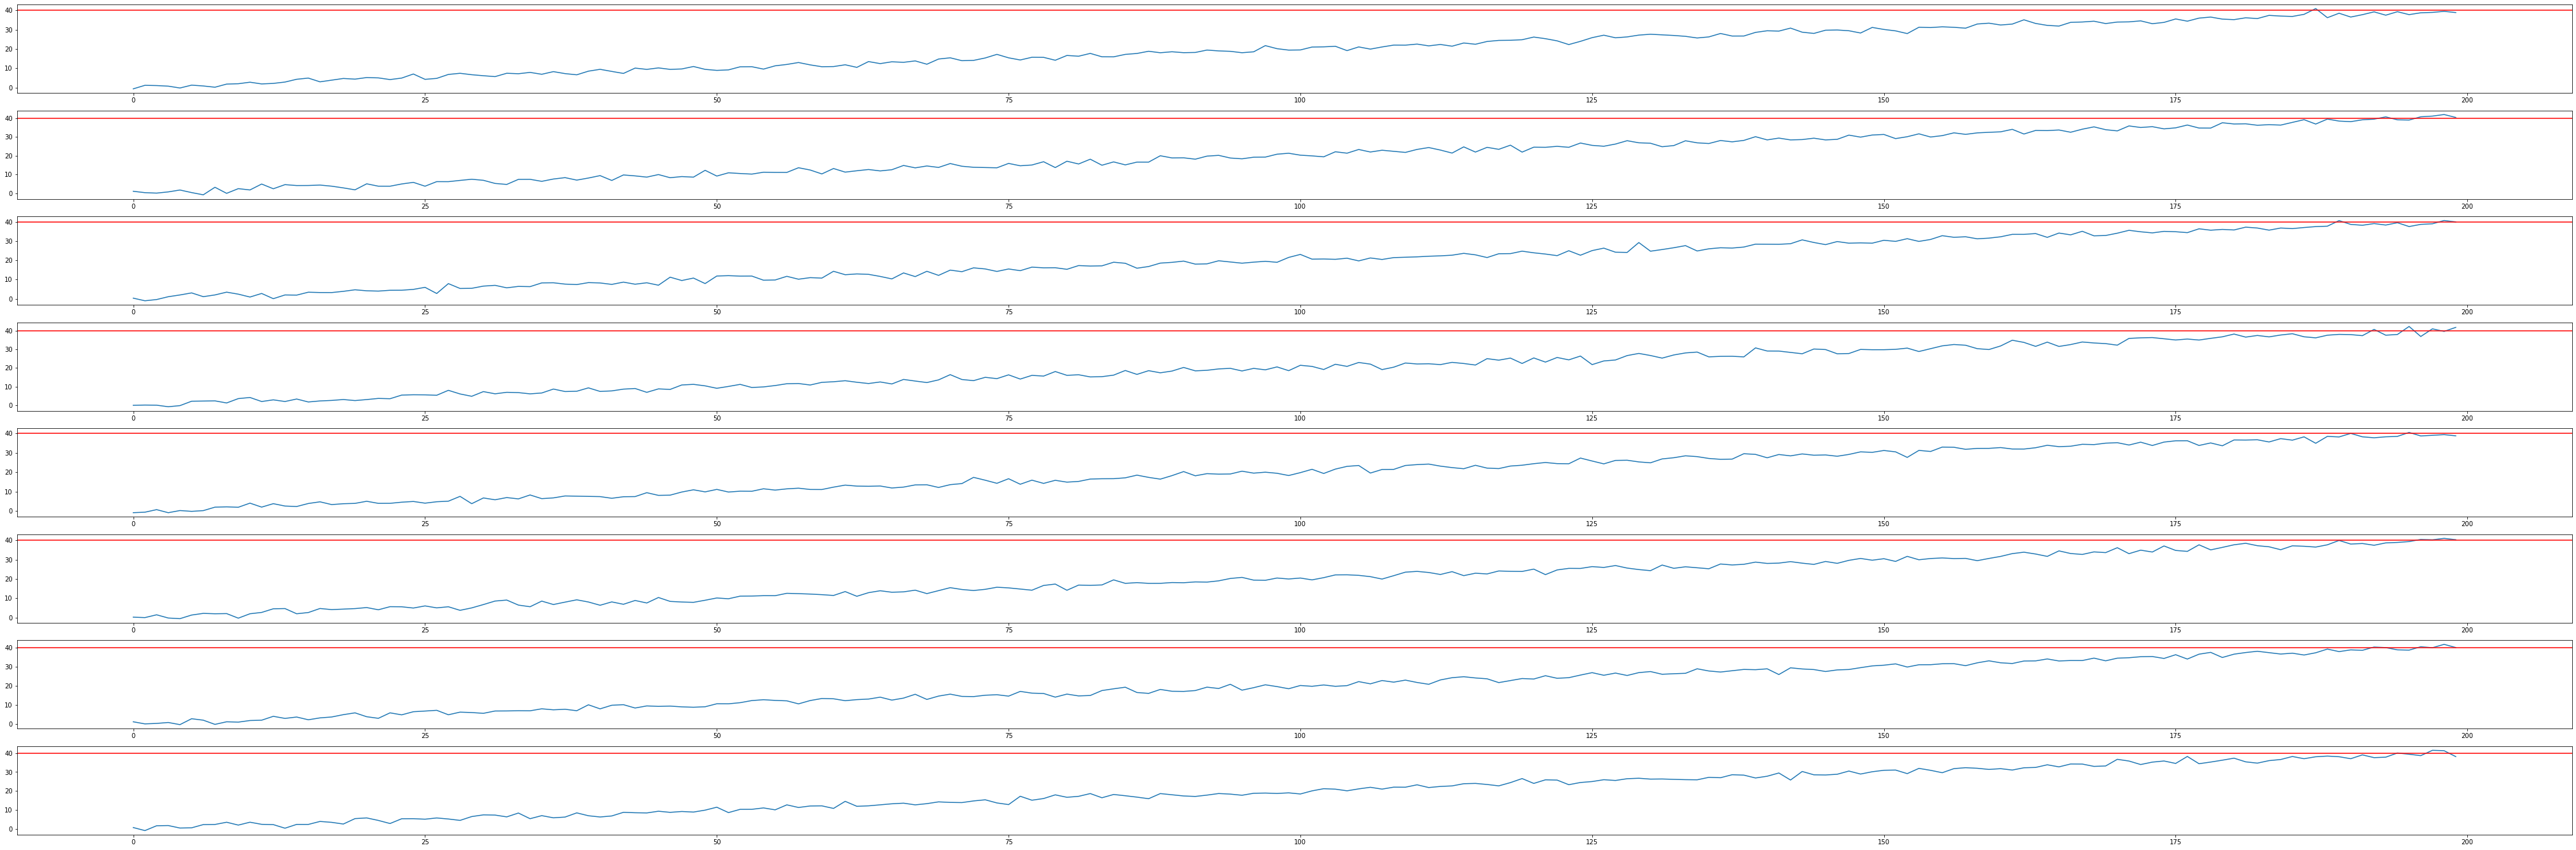

In [3]:
plt.figure(figsize=(72, 24))
for i in range(I):
    ax = plt.subplot(I, 1, i + 1)
    ax.plot(range(T),all_y[i,])
    ax.axhline(y=40,color='red')

# Simulation: Example 2

In [4]:
all_y = np.random.standard_normal((I,T)) 
all_y = np.cumsum(all_y,1)

# Plots: Example 2

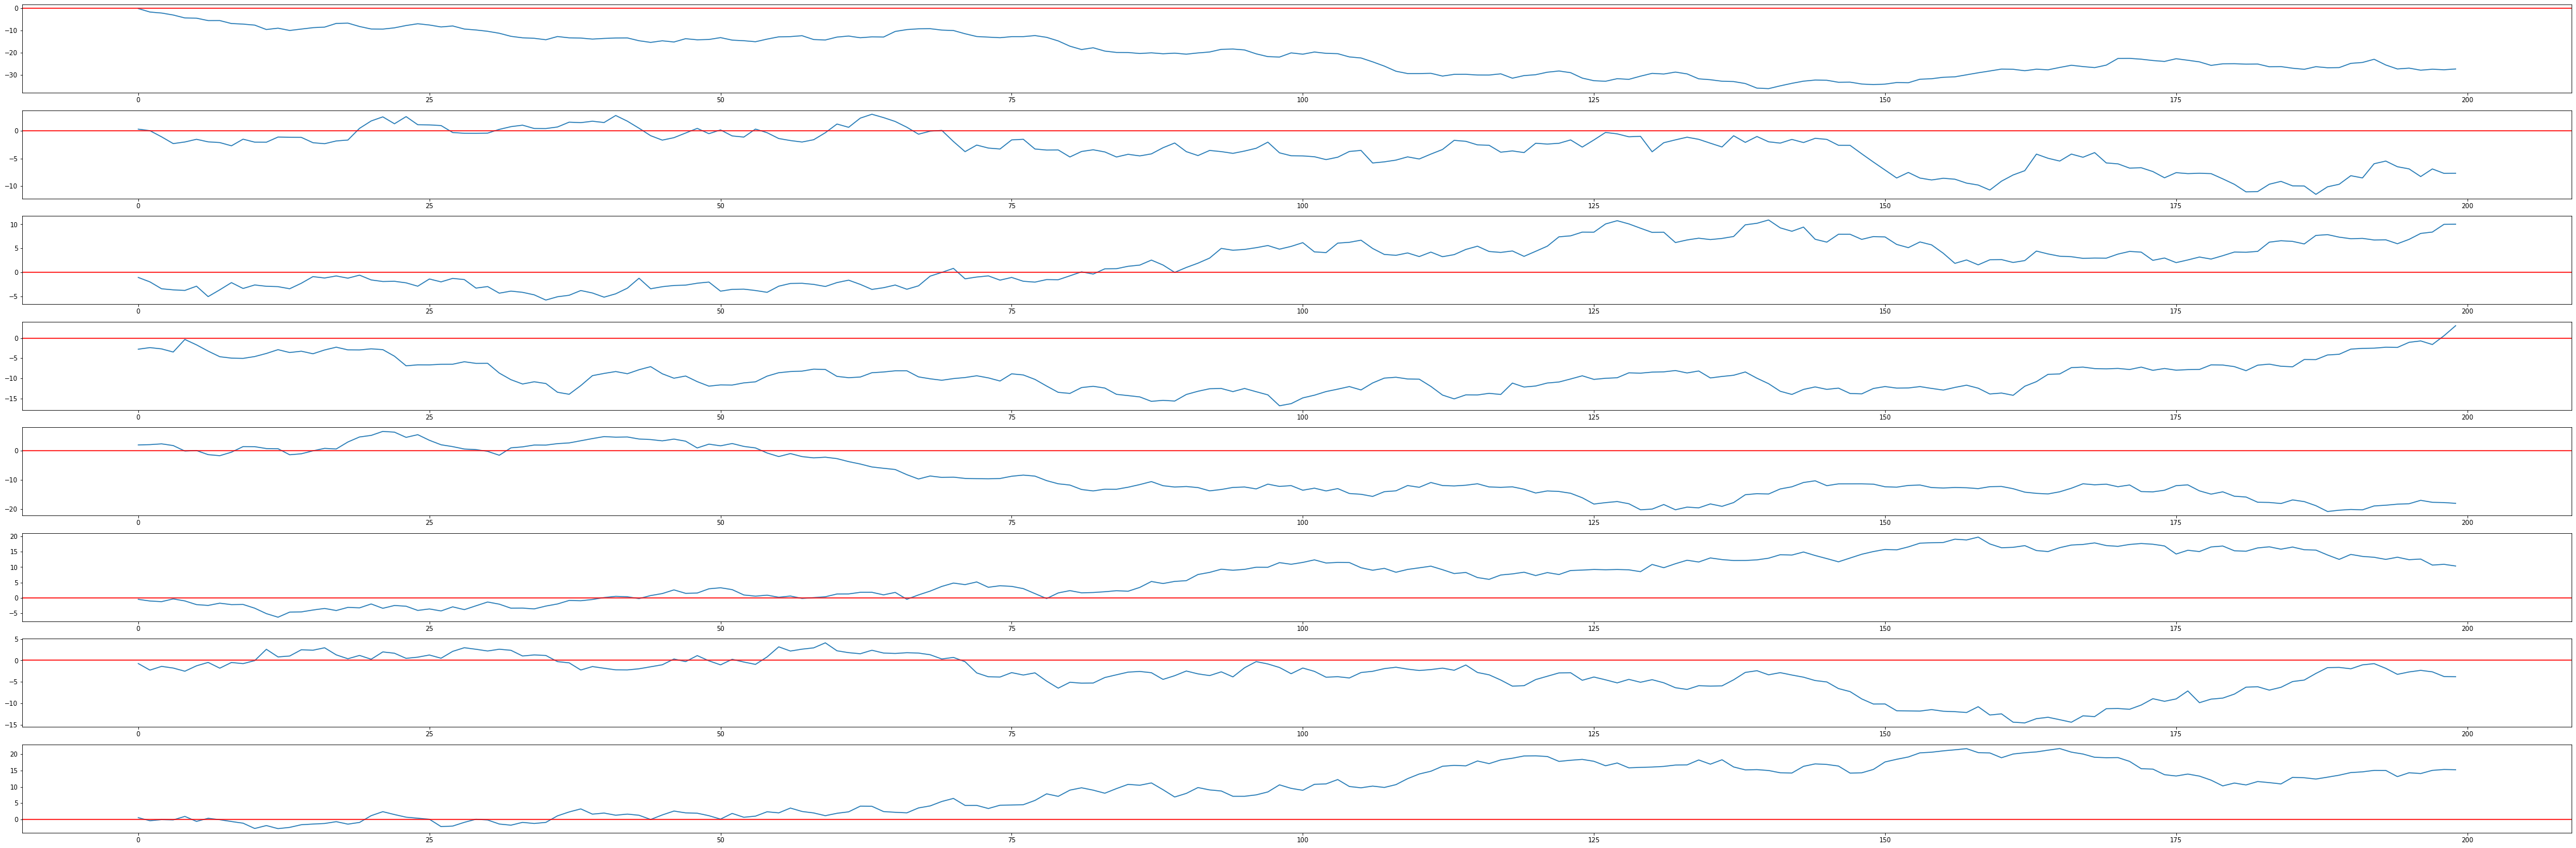

In [5]:
plt.figure(figsize=(72, 24))
for i in range(I):
    ax = plt.subplot(I, 1, i + 1)
    ax.plot(range(T),all_y[i,])
    ax.axhline(y=0,color='red')

<h2 style = "fontsize:300%;text-align:center;">Playing with lag operators</h2>

<h2 style = "fontsize:300%;text-align:center;">Box Jenkins</h2>

<h2 style = "fontsize:300%;text-align:center;">Auto ARIMA</h2>